In [ ]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('fivethirtyeight')
%matplotlib inline

# Defining the parameters
batch_size = 32
num_classes = 10
epochs = 20

In [ ]:
# Splitting the data between train and test

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# Building the CNN Model (Hidden Output)

model = Sequential()
model.add(tf.keras.Input(shape=x_train.shape[1:]))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# compile (Hidden Output)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255

epochs=15

# Training the model
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.3319 - loss: 9.6865 - val_accuracy: 0.5417 - val_loss: 6.0345
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.5272 - loss: 5.4356 - val_accuracy: 0.6291 - val_loss: 3.6320
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6175 - loss: 3.3449 - val_accuracy: 0.6800 - val_loss: 2.3548
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6701 - loss: 2.1979 - val_accuracy: 0.6810 - val_loss: 1.7603
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7072 - loss: 1.5931 - val_accuracy: 0.7322 - val_loss: 1.3039
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7294 - loss: 1.2565 - val_accuracy: 0.6648 - val_loss: 1.3449
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7533 - loss: 1.0633 - val_accuracy: 0.7454 - val_loss: 1.0384
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7620 - loss: 

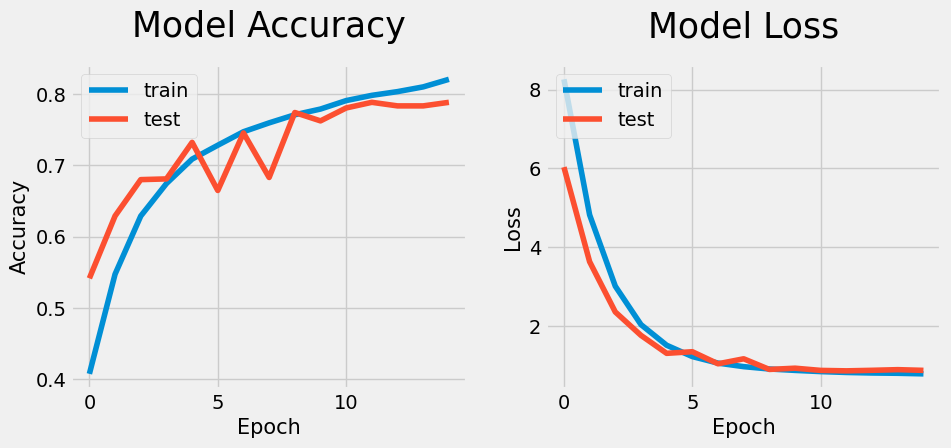

In [ ]:
# Plotting the Model Accuracy & Model Loss vs Epochs (Hidden Input)
plt.figure(figsize=[10,4])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Get model predictions (probabilities) for the test data
y_score = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
from sklearn.preprocessing import label_binarize

# Binarize the test labels (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=[i for i in range(num_classes)])


In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


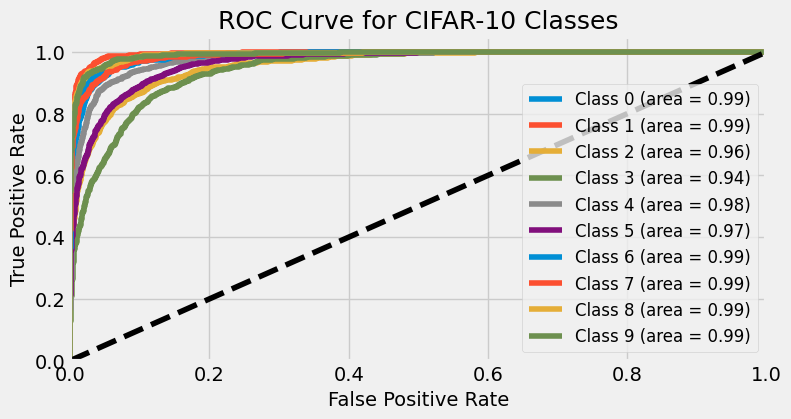

In [ ]:
# Plot ROC curves for each class
plt.figure(figsize=[8,4])

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

# Plot the diagonal for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.title('ROC Curve for CIFAR-10 Classes', size=18)
plt.legend(loc="lower right", fontsize=12)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


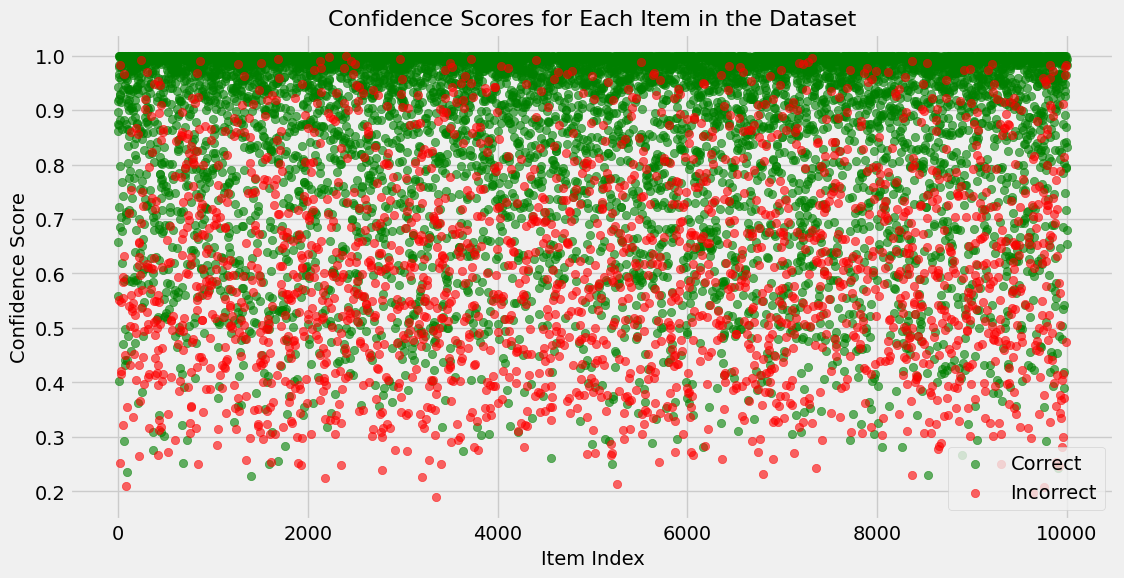

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model, and you have already loaded 'x_test' and 'y_test'
# Get model predictions (probabilities) for all classes
y_score = model.predict(x_test)

# Get predicted class labels from the model
y_pred = np.argmax(y_score, axis=1)

# Ensure y_test is in label format (flatten if necessary)
if y_test.shape[1] == num_classes:  # if one-hot encoded
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test.flatten()

# Get the confidence scores for the predicted class for each item
confidence_scores = np.max(y_score, axis=1)

# Determine whether each prediction is correct (True/False)
correct_predictions = (y_pred == y_test_labels)

# Create an array of indices representing the items in the dataset
n = len(x_test)
indices = np.arange(n)

# Plot the confidence scores
plt.figure(figsize=(12, 6))

# Plot correct predictions (green)
plt.scatter(indices[correct_predictions], confidence_scores[correct_predictions], color='green', label='Correct', alpha=0.6)

# Plot incorrect predictions (red)
plt.scatter(indices[~correct_predictions], confidence_scores[~correct_predictions], color='red', label='Incorrect', alpha=0.6)

# Set plot labels and title
plt.xlabel('Item Index', size=14)
plt.ylabel('Confidence Score', size=14)
plt.title('Confidence Scores for Each Item in the Dataset', size=16)

# Add a legend to differentiate correct/incorrect predictions
plt.legend()

# Show the plot
plt.show()


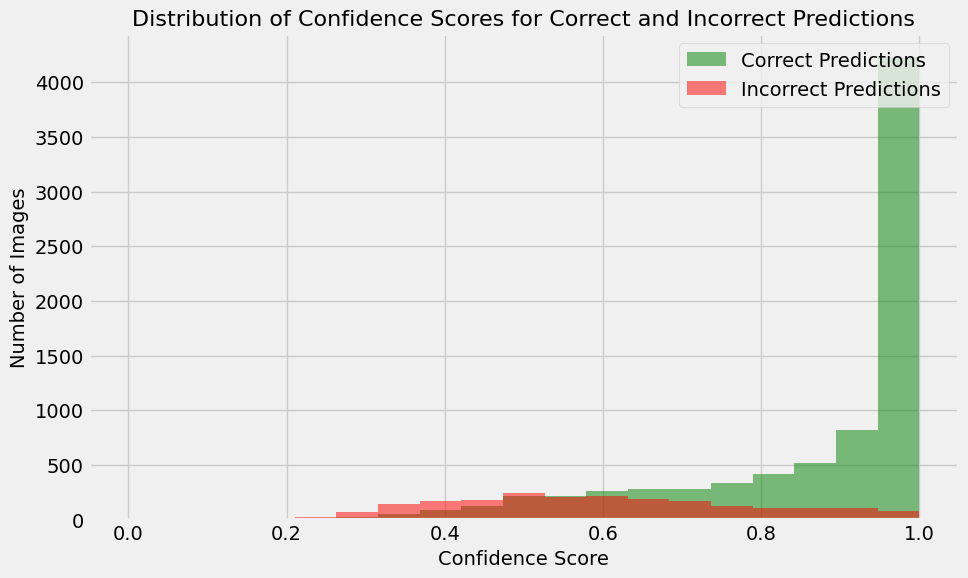

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the confidence scores and correctness data from previous code
# 'confidence_scores' contains the confidence score for each item
# 'correct_predictions' is a boolean array indicating if each prediction is correct

# Define the bins for confidence scores
bins = np.linspace(0, 1, 20)  # 20 bins from 0 to 1

# Separate confidence scores into correct and incorrect predictions
correct_confidence_scores = confidence_scores[correct_predictions]
incorrect_confidence_scores = confidence_scores[~correct_predictions]

# Plot the histograms
plt.figure(figsize=(10, 6))
plt.hist(correct_confidence_scores, bins, alpha=0.5, color='green', label='Correct Predictions')
plt.hist(incorrect_confidence_scores, bins, alpha=0.5, color='red', label='Incorrect Predictions')

# Labeling the plot
plt.xlabel('Confidence Score', size=14)
plt.ylabel('Number of Images', size=14)
plt.title('Distribution of Confidence Scores for Correct and Incorrect Predictions', size=16)
plt.legend(loc='upper right')

# Show the plot
plt.show()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


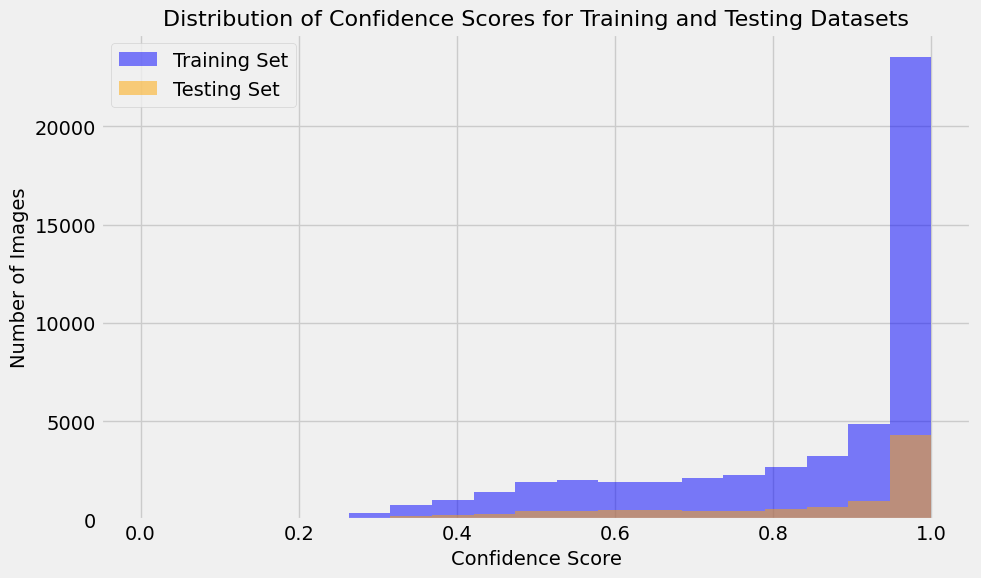

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model, and you have already loaded 'x_train', 'y_train', 'x_test', and 'y_test'
# Get model predictions (probabilities) for all classes for both datasets
y_score_train = model.predict(x_train)
y_score_test = model.predict(x_test)

# Get the confidence scores for the predicted class for each item in both datasets
confidence_scores_train = np.max(y_score_train, axis=1)
confidence_scores_test = np.max(y_score_test, axis=1)

# Plot histograms
plt.figure(figsize=(10, 6))

# Define the bins for the confidence scores (from 0 to 1 in 20 bins)
bins = np.linspace(0, 1, 20)

# Plot histogram for training set confidence scores
plt.hist(confidence_scores_train, bins=bins, alpha=0.5, label='Training Set', color='blue')

# Plot histogram for testing set confidence scores
plt.hist(confidence_scores_test, bins=bins, alpha=0.5, label='Testing Set', color='orange')

# Set plot labels and title
plt.xlabel('Confidence Score', size=14)
plt.ylabel('Number of Images', size=14)
plt.title('Distribution of Confidence Scores for Training and Testing Datasets', size=16)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
import numpy as np

# Assuming confidence_scores_train and confidence_scores_test are already defined
confidence_scores_train = np.max(y_score_train, axis=1)  # Get confidence scores for training dataset
confidence_scores_test = np.max(y_score_test, axis=1)    # Get confidence scores for testing dataset

# Function to calculate probability distribution of confidence scores
def calculate_probabilities(confidence_scores):
    # Create a histogram to count occurrences of each score
    hist, bin_edges = np.histogram(confidence_scores, bins=np.linspace(0, 1, 100), density=True)

    # Calculate the probabilities for each bin
    probabilities = hist / np.sum(hist)

    # Get midpoints of bins for probability mapping
    mid_points = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    return mid_points, probabilities

# Calculate probabilities for training and testing datasets
train_mid_points, train_probabilities = calculate_probabilities(confidence_scores_train)
test_mid_points, test_probabilities = calculate_probabilities(confidence_scores_test)

# Find maximum probability for training dataset
max_train_prob = np.max(train_probabilities)
max_train_score = train_mid_points[np.argmax(train_probabilities)]

# Find the confidence score at 70% probability for training dataset
train_70_prob_score = train_mid_points[train_probabilities >= 0.7]
train_70_prob = 0.7 if train_70_prob_score.size > 0 else None

# Find maximum probability for testing dataset
max_test_prob = np.max(test_probabilities)
max_test_score = test_mid_points[np.argmax(test_probabilities)]

# Find the confidence score at 70% probability for testing dataset
test_70_prob_score = test_mid_points[test_probabilities >= 0.7]
test_70_prob = 0.7 if test_70_prob_score.size > 0 else None

# Output results
print(f"Training Dataset: Max Probability: {max_train_prob:.2f} at Confidence Score: {max_train_score:.2f}")
print(f"70% Probability Confidence Score: {train_70_prob_score[0]:.2f}" if train_70_prob_score.size > 0 else "No score found for 70% probability")

print(f"Testing Dataset: Max Probability: {max_test_prob:.2f} at Confidence Score: {max_test_score:.2f}")
print(f"70% Probability Confidence Score: {test_70_prob_score[0]:.2f}" if test_70_prob_score.size > 0 else "No score found for 70% probability")


Training Dataset: Max Probability: 0.30 at Confidence Score: 0.99
No score found for 70% probability
Testing Dataset: Max Probability: 0.28 at Confidence Score: 0.99
No score found for 70% probability


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


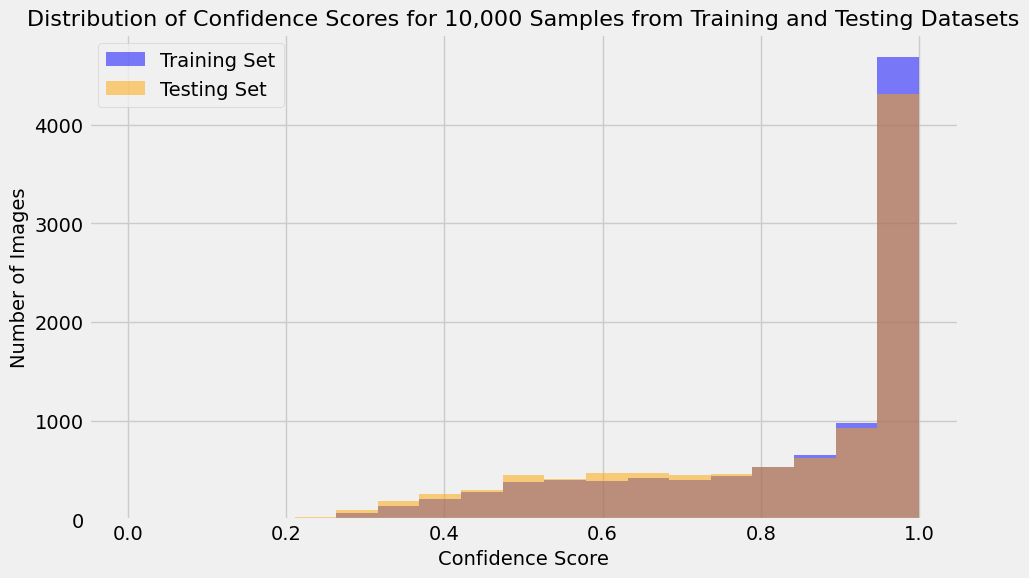

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model, and you have already loaded 'x_train', 'y_train', 'x_test', and 'y_test'
# Get model predictions (probabilities) for all classes for both datasets
y_score_train = model.predict(x_train)
y_score_test = model.predict(x_test)

# Get the confidence scores for the predicted class for each item in both datasets
confidence_scores_train = np.max(y_score_train, axis=1)
confidence_scores_test = np.max(y_score_test, axis=1)

# Sample 10,000 items from each dataset
n_samples = 10000

# Randomly select indices for training and testing datasets
train_indices = np.random.choice(len(confidence_scores_train), size=n_samples, replace=False)
test_indices = np.random.choice(len(confidence_scores_test), size=n_samples, replace=False)

# Get the sampled confidence scores
sampled_train_scores = confidence_scores_train[train_indices]
sampled_test_scores = confidence_scores_test[test_indices]

# Plot histograms
plt.figure(figsize=(10, 6))

# Define the bins for the confidence scores (from 0 to 1 in 20 bins)
bins = np.linspace(0, 1, 20)

# Plot histogram for training set confidence scores
plt.hist(sampled_train_scores, bins=bins, alpha=0.5, label='Training Set', color='blue')

# Plot histogram for testing set confidence scores
plt.hist(sampled_test_scores, bins=bins, alpha=0.5, label='Testing Set', color='orange')

# Set plot labels and title
plt.xlabel('Confidence Score', size=14)
plt.ylabel('Number of Images', size=14)
plt.title('Distribution of Confidence Scores for 10,000 Samples from Training and Testing Datasets', size=16)

# Add legend
plt.legend()

# Show the plot
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training Dataset: Max Probability: 0.29 at Confidence Score: 0.99
No score found for 70% probability
Testing Dataset: Max Probability: 0.26 at Confidence Score: 0.99
No score found for 70% probability


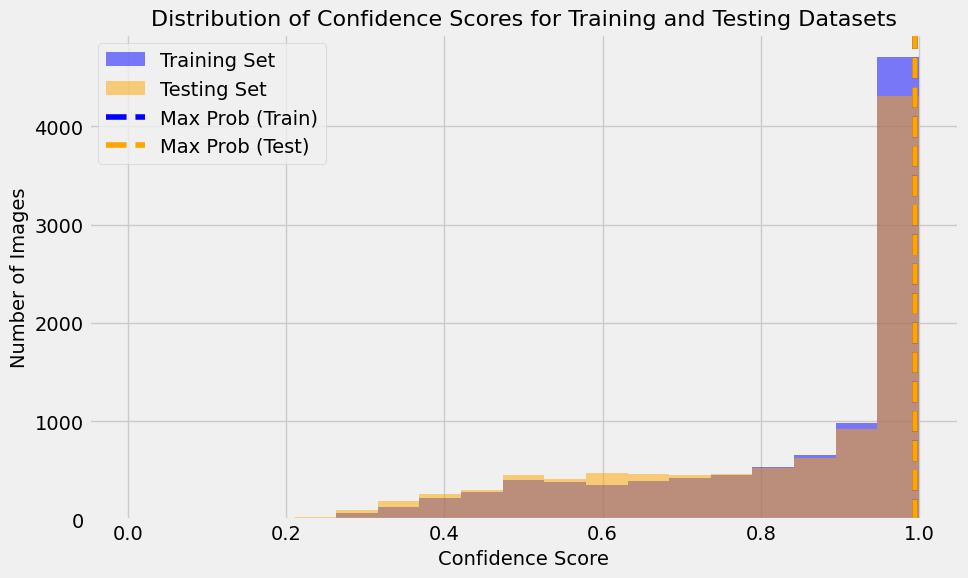

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model and you have loaded 'x_train', 'y_train', 'x_test', and 'y_test'
# Get model predictions (probabilities) for both datasets
y_score_train = model.predict(x_train[:10000])  # Use only 10,000 images from training dataset
y_score_test = model.predict(x_test[:10000])    # Use only 10,000 images from testing dataset

# Get the confidence scores for the predicted class for each item
confidence_scores_train = np.max(y_score_train, axis=1)
confidence_scores_test = np.max(y_score_test, axis=1)

# Function to calculate probability distribution of confidence scores
def calculate_probabilities(confidence_scores):
    # Create a histogram to count occurrences of each score
    hist, bin_edges = np.histogram(confidence_scores, bins=np.linspace(0, 1, 100), density=True)

    # Calculate the probabilities for each bin
    probabilities = hist / np.sum(hist)

    # Get midpoints of bins for probability mapping
    mid_points = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    return mid_points, probabilities

# Calculate probabilities for training and testing datasets
train_mid_points, train_probabilities = calculate_probabilities(confidence_scores_train)
test_mid_points, test_probabilities = calculate_probabilities(confidence_scores_test)

# Find maximum probability for training dataset
max_train_prob = np.max(train_probabilities)
max_train_score = train_mid_points[np.argmax(train_probabilities)]

# Find the confidence score at 70% probability for training dataset
train_70_prob_score = train_mid_points[train_probabilities >= 0.7]
train_70_prob = 0.7 if train_70_prob_score.size > 0 else None

# Find maximum probability for testing dataset
max_test_prob = np.max(test_probabilities)
max_test_score = test_mid_points[np.argmax(test_probabilities)]

# Find the confidence score at 70% probability for testing dataset
test_70_prob_score = test_mid_points[test_probabilities >= 0.7]
test_70_prob = 0.7 if test_70_prob_score.size > 0 else None

# Output results
print(f"Training Dataset: Max Probability: {max_train_prob:.2f} at Confidence Score: {max_train_score:.2f}")
print(f"70% Probability Confidence Score: {train_70_prob_score[0]:.2f}" if train_70_prob_score.size > 0 else "No score found for 70% probability")

print(f"Testing Dataset: Max Probability: {max_test_prob:.2f} at Confidence Score: {max_test_score:.2f}")
print(f"70% Probability Confidence Score: {test_70_prob_score[0]:.2f}" if test_70_prob_score.size > 0 else "No score found for 70% probability")

# Plot histograms with vertical lines for max probability and 70% probability
plt.figure(figsize=(10, 6))
bins = np.linspace(0, 1, 20)

# Plot histogram for training set confidence scores
plt.hist(confidence_scores_train, bins=bins, alpha=0.5, label='Training Set', color='blue')

# Plot histogram for testing set confidence scores
plt.hist(confidence_scores_test, bins=bins, alpha=0.5, label='Testing Set', color='orange')

# Vertical lines for training dataset
plt.axvline(x=max_train_score, color='blue', linestyle='--', label='Max Prob (Train)')
if train_70_prob_score.size > 0:
    plt.axvline(x=train_70_prob_score[0], color='blue', linestyle=':', label='70% Prob (Train)')

# Vertical lines for testing dataset
plt.axvline(x=max_test_score, color='orange', linestyle='--', label='Max Prob (Test)')
if test_70_prob_score.size > 0:
    plt.axvline(x=test_70_prob_score[0], color='orange', linestyle=':', label='70% Prob (Test)')

# Set plot labels and title
plt.xlabel('Confidence Score', size=14)
plt.ylabel('Number of Images', size=14)
plt.title('Distribution of Confidence Scores for Training and Testing Datasets', size=16)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
import numpy as np

# Assuming `confidence_scores_train` and `confidence_scores_test` contain the confidence scores
# for the training and testing datasets, respectively.

# Define the confidence thresholds (multiples of 0.1)
thresholds = np.arange(0, 1.1, 0.1)

# Prepare lists to store probabilities for each threshold
prob1_beyond_train = []
prob1_beyond_test = []
prob2_upto_train = []
prob2_upto_test = []

# Calculate probabilities at each threshold
for threshold in thresholds:
    # Count for images in training and testing datasets above the threshold
    train_beyond = np.sum(confidence_scores_train > threshold)
    test_beyond = np.sum(confidence_scores_test > threshold)
    total_beyond = train_beyond + test_beyond

    # Count for images in training and testing datasets up to the threshold
    train_upto = np.sum(confidence_scores_train <= threshold)
    test_upto = np.sum(confidence_scores_test <= threshold)
    total_upto = train_upto + test_upto

    # Probability calculations:
    # Probability1 (beyond threshold, for train and test datasets)
    if total_beyond > 0:
        prob1_train = round(train_beyond / total_beyond, 3)
        prob1_test = round(test_beyond / total_beyond, 3)
    else:
        prob1_train = prob1_test = None  # Set to None if no data points are beyond the threshold

    # Probability2 (up to threshold, for train and test datasets)
    if total_upto > 0:
        prob2_train = round(train_upto / total_upto, 3)
        prob2_test = round(test_upto / total_upto, 3)
    else:
        prob2_train = prob2_test = None  # Set to None if no data points are up to the threshold

    # Store the probabilities
    prob1_beyond_train.append(prob1_train)
    prob1_beyond_test.append(prob1_test)
    prob2_upto_train.append(prob2_train)
    prob2_upto_test.append(prob2_test)

# Display results
print("Confidence Thresholds:", thresholds)
print("Probability1 (Beyond Threshold, Training Dataset):", prob1_beyond_train)
print("Probability1 (Beyond Threshold, Testing Dataset):", prob1_beyond_test)
print("Probability2 (Up to Threshold, Training Dataset):", prob2_upto_train)
print("Probability2 (Up to Threshold, Testing Dataset):", prob2_upto_test)


Confidence Thresholds: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Probability1 (Beyond Threshold, Training Dataset): [0.5, 0.5, 0.5, 0.501, 0.503, 0.505, 0.51, 0.515, 0.519, 0.52, None]
Probability1 (Beyond Threshold, Testing Dataset): [0.5, 0.5, 0.5, 0.499, 0.497, 0.495, 0.49, 0.485, 0.481, 0.48, None]
Probability2 (Up to Threshold, Training Dataset): [None, None, 0.0, 0.422, 0.425, 0.451, 0.455, 0.456, 0.463, 0.476, 0.5]
Probability2 (Up to Threshold, Testing Dataset): [None, None, 1.0, 0.578, 0.575, 0.549, 0.545, 0.544, 0.537, 0.524, 0.5]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


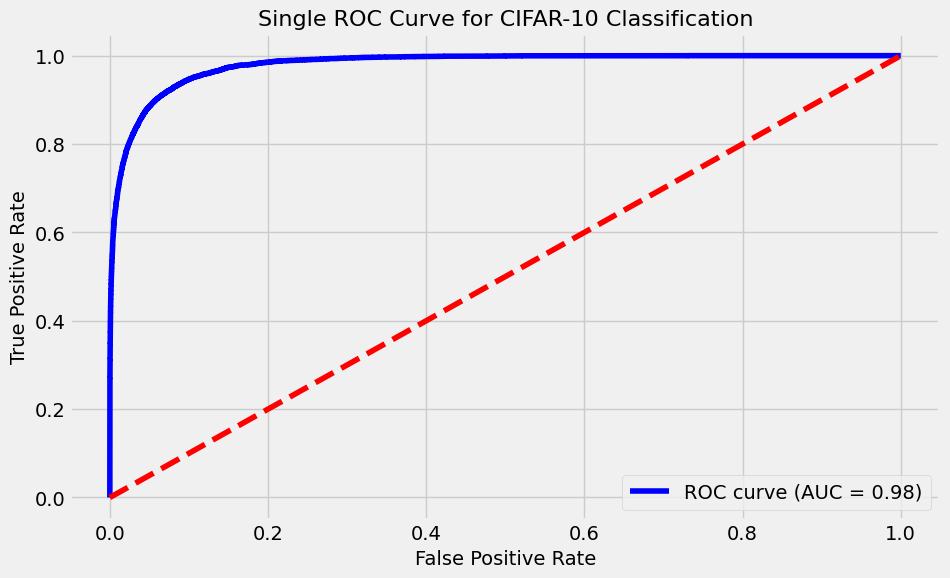

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data (if not done during training)
x_test = x_test.astype('float32') / 255.0

# Assuming 'model' is your trained model, get model predictions
y_score_test = model.predict(x_test)

# Binarize the true labels (flatten the labels)
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train)).ravel()

# Flatten the predicted probabilities
y_score_flat = y_score_test.ravel()

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_binarized, y_score_flat)
roc_auc = auc(fpr, tpr)

# Plot the single ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Set plot labels and title
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.title('Single ROC Curve for CIFAR-10 Classification', size=16)

# Add legend
plt.legend(loc='best')

# Show the plot
plt.show()
